In [7]:
import numpy as np
import matplotlib.pyplot as plt
number=101

# Q.2

## (a)Euler Method:

In [8]:
a=1
b=5
K_E=np.zeros(number-1)
for N in range(1,number):
    h=(b-a)/N
    k=np.zeros(N+1)
    epsilon=np.zeros(N+1)
    t=np.zeros(N+1)
    #At t_0=1s, k=1.0m^2/s^2 and ϵ=0.2176m^2/s^3
    k[0]=1
    epsilon[0]=0.2176
    t[0]=a
    C=1.83
    for i in range(N):
        t_ip1=a+(i+1)*h
        t[i+1]=t_ip1
        k[i+1]=k[i]+h*(-epsilon[i])
        epsilon[i+1]=epsilon[i]+h*(-C*epsilon[i]**2/k[i])
    K_E[N-1]=k[i+1]

## (b) Modified Euler method

In [9]:

K_M=np.zeros(number-1)
for N in range(1,number):
    k_modi=np.zeros(N+1)
    epsilon_modi=np.zeros(N+1)
    k_modi[0]=1
    epsilon_modi[0]=0.2176
    h=(b-a)/N
    k=np.zeros(N+1)
    epsilon=np.zeros(N+1)
    t=np.zeros(N+1)
    #At t_0=1s, k=1.0m^2/s^2 and ϵ=0.2176m^2/s^3
    k[0]=1
    epsilon[0]=0.2176
    t[0]=1
    C=1.83
    for i in range(N):
        t_ip1=a+(i+1)*h
        t[i+1]=t_ip1
        k[i+1]=k[i]+h*(-epsilon[i])
        epsilon[i+1]=epsilon[i]+h*(-C*epsilon[i]**2/k[i])
        k_bar=k[i]+h*(-epsilon[i])
        epsilon_bar=epsilon[i]+h*(-C*epsilon[i]**2/k[i])
        k[i+1]=k[i]+h/2*(-epsilon[i]-epsilon_bar)
        epsilon[i+1]=epsilon[i]+h/2*(-C*epsilon[i]**2/k[i]-C*epsilon_bar**2/k_bar)
    K_M[N-1]=k[i+1]

## (c) RK-4 method.

In [10]:
K_R=np.zeros(number-1)

In [11]:
def f_1(epsilon_rk):
    return -epsilon_rk
def f_2(k_rk,epsilon_rk):
    C=1.83
    return -C*(epsilon_rk**2)/k_rk

for N in range(1,number):
    k_rk=np.zeros(N+1)
    epsilon_rk=np.zeros(N+1)
    #At t_0=1s, k=1.0m^2/s^2 and ϵ=0.2176m^2/s^3
    k_rk[0]=1
    epsilon_rk[0]=0.2176
    h=(b-a)/N
    C=1.83
    t=np.zeros(N+1)
    t[0]=1
    for i in range(N):
        
        k_rk_i=k_rk[i]
        epsilon_rk_i=epsilon_rk[i]
        t_i=t[i]
        t_ip1=a+(i+1)*h
        t[i+1]=t_ip1
        
        k_rk_11=h*f_1(epsilon_rk_i)
        k_rk_21=h*f_2(k_rk_i,epsilon_rk_i)

        k_rk_12=h*f_1(epsilon_rk_i+k_rk_21/2)
        k_rk_22=h*f_2(k_rk_i+k_rk_11/2,epsilon_rk_i+k_rk_21/2)

        k_rk_13=h*f_1(epsilon_rk_i+k_rk_22/2)
        k_rk_23=h*f_2(k_rk_i+k_rk_12/2,epsilon_rk_i+k_rk_22/2)

        k_rk_14=h*f_1(epsilon_rk_i+k_rk_23)
        k_rk_24=h*f_2(k_rk_i+k_rk_13,epsilon_rk_i+k_rk_23)
        
        k_rk[i+1]=k_rk[i]+(k_rk_11+2*k_rk_12+2*k_rk_13+k_rk_14)/6
        epsilon_rk[i+1]=epsilon_rk[i]+(k_rk_21+2*k_rk_22+2*k_rk_23+k_rk_24)/6
        
    K_R[N-1]=k_rk[i+1]


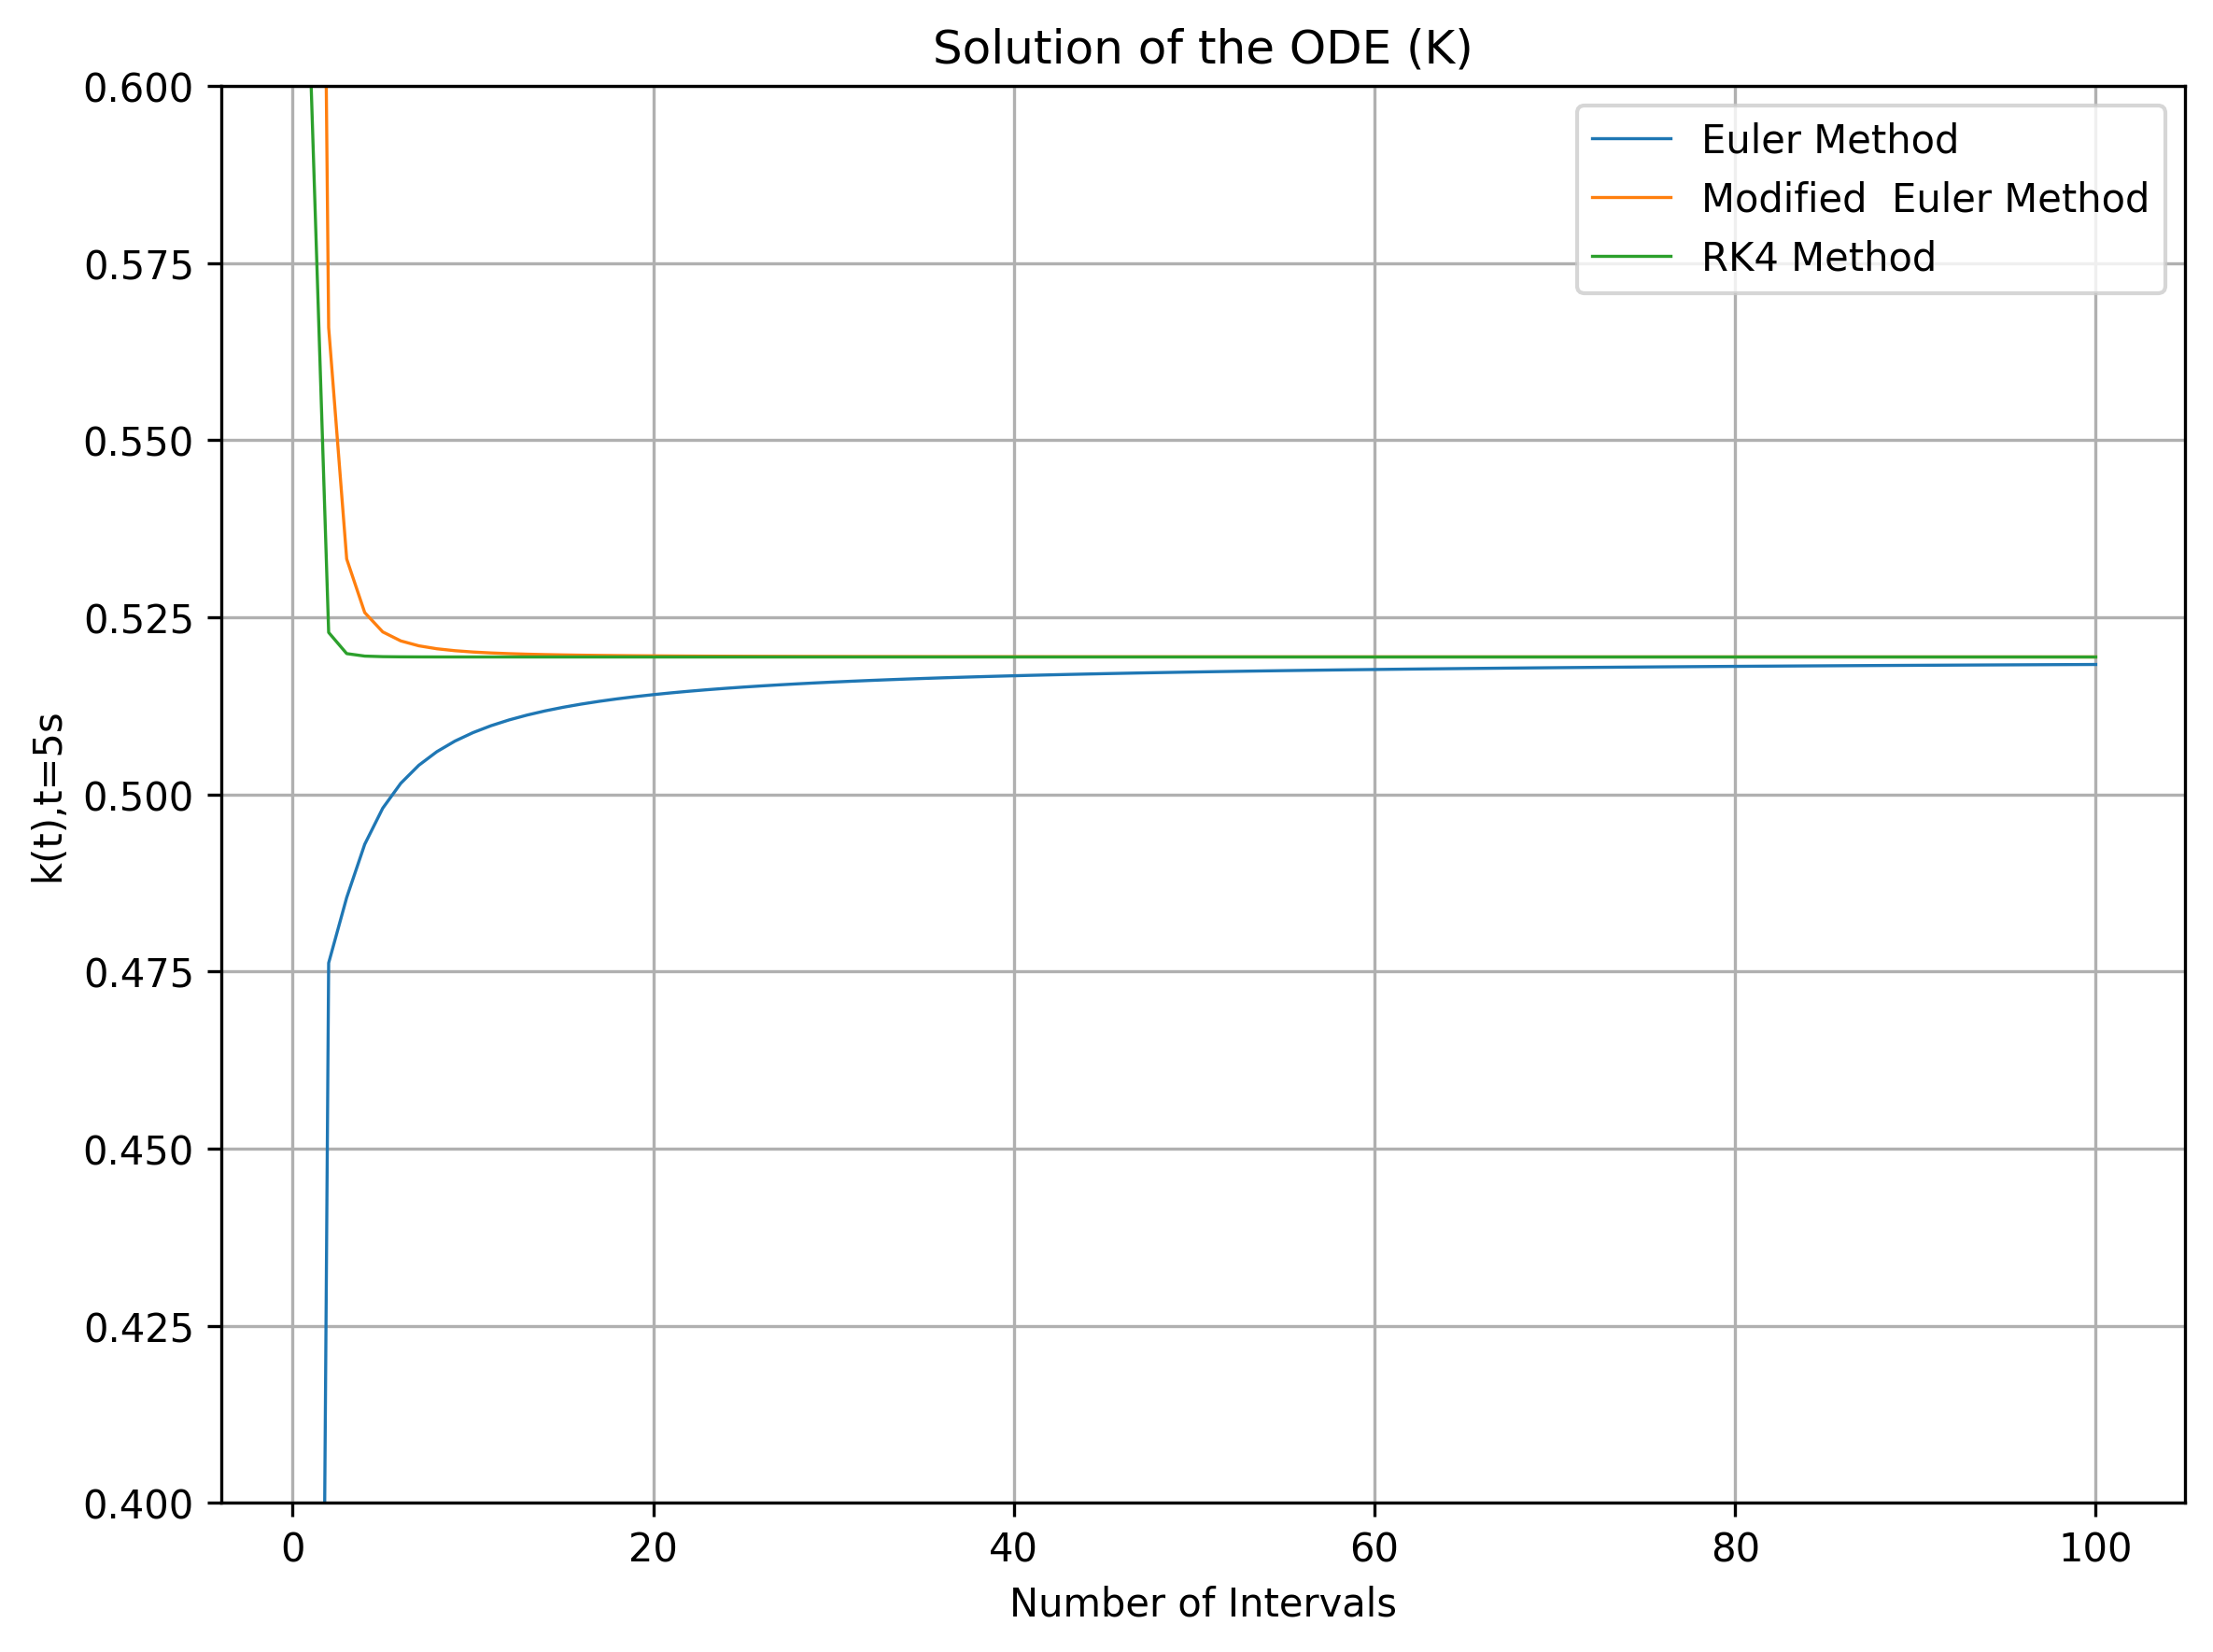

In [12]:
plt.figure(figsize=(8, 6), dpi=300)
plt.ylim([0.4,0.6])
N=np.linspace(1,number-1,number-1)
plt.plot(N, K_E, label=f"Euler Method",linewidth=0.8)
plt.plot(N, K_M, label=f"Modified  Euler Method",linewidth=0.8)
plt.plot(N, K_R, label=f"RK4 Method",linewidth=0.8)
plt.title("Solution of the ODE (K)")
plt.xlabel("Number of Intervals")
plt.ylabel("k(t),t=5s")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()